In [132]:

import os 
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorboard_extract import convert_tfevent
from tqdm import tqdm 
import seaborn as sns 

save_dir = "results"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
# path = '../untracked/CartPole-v1'

all_dfs = [] 
for env in ['Acrobot-v1', 'CartPole-v1']:
    path = '../untracked/'+env
    models= os.listdir(path)
    model_count = {}
    for model in tqdm(models):
        model_path = os.path.join(path, model)
        event_path =os.path.join(model_path, [f for f in os.listdir(model_path) if 'events.' in f][0])
        df = convert_tfevent(event_path)
        df = df[df['name'] == 'charts/episodic_return']            
        df['model'] = model
        df['env'] = env
        hyp = model.split("_")

        df['q'] = hyp[2]
        if hyp[2] in model_count.keys():
            model_count[hyp[2]]+=1
        else:
            model_count[hyp[2]] = 0
        df['seed'] = model_count[hyp[2]]
        if env=='Acrobot-v1':
            t = 2000
        if env=='CartPole-v1':
            t = 1000
        df['step_agg'] = (df['step'] //t)*t
        df['time'] =df['wall_time'].max() -  df['wall_time'].min()
        all_dfs.append(df)

df = pd.concat(all_dfs)
df = df.reset_index()
df.head()


100%|██████████| 12/12 [00:09<00:00,  1.27it/s]


,index,wall_time,name,step,value,model,env,q,seed,step_agg,time
0,1,1.667484e+09,charts/episodic_return,499,-500.0,mse_quantile_0.5__1667483808,Acrobot-v1,0.5,0,0,2472.82402
1,4,1.667484e+09,charts/episodic_return,999,-500.0,mse_quantile_0.5__1667483808,Acrobot-v1,0.5,0,0,2472.82402
2,7,1.667484e+09,charts/episodic_return,1499,-500.0,mse_quantile_0.5__1667483808,Acrobot-v1,0.5,0,0,2472.82402
3,10,1.667484e+09,charts/episodic_return,1999,-500.0,mse_quantile_0.5__1667483808,Acrobot-v1,0.5,0,0,2472.82402
4,13,1.667484e+09,charts/episodic_return,2499,-500.0,mse_quantile_0.5__1667483808,Acrobot-v1,0.5,0,2000,2472.82402


/tmp/ipykernel_16234/2257440750.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:d}'.format(int(x)) for x in vals])


<Figure size 1440x720 with 0 Axes>

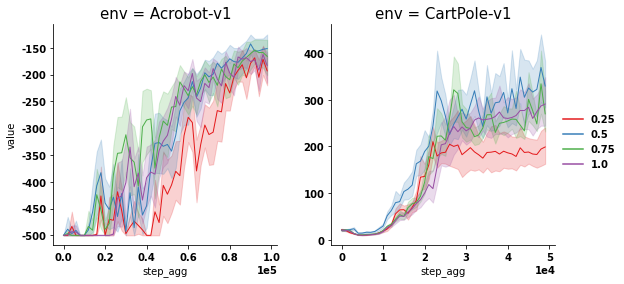

In [133]:
plt.figure(figsize=(20,10))
g = sns.FacetGrid(df, col="env", sharey=False,sharex=False, height=4, aspect=1, )
g.map_dataframe(sns.lineplot, x="step_agg", y="value", hue="q", palette='Set1', lw=1, hue_order=['0.25', '0.5', '0.75', '1.0'])
g.add_legend()
for i, ax in enumerate(g.axes[0]):
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:d}'.format(int(x)) for x in vals])
    vals = ax.get_xticks()
    # ax.set_xticklabels([x for x in vals])
    ax.set_title(ax.get_title(), fontsize=15)
    ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))  
plt.savefig(f'{save_dir}/train.pdf')
    

# Analyze Distil

In [38]:

import os 
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorboard_extract import convert_tfevent
from tqdm import tqdm 
import seaborn as sns 

save_dir = "results"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
# path = '../untracked/CartPole-v1'

all_dfs = [] 
for env in ['Acrobot-v1', 'CartPole-v1']:
    path = '../untracked/'+env
    models= os.listdir(path)
    model_count = {}
    for model in tqdm(models):
        model_path = os.path.join(path, model)
        event_path =os.path.join(model_path, [f for f in os.listdir(model_path) if 'events.' in f][0])
        df = convert_tfevent(event_path)
        df = df[df['name'] == 'losses/distil']            
        df['model'] = model
        df['env'] = env
        hyp = model.split("_")

        df['q'] = hyp[2]
        if hyp[2] in model_count.keys():
            model_count[hyp[2]]+=1
        else:
            model_count[hyp[2]] = 0
        df['seed'] = model_count[hyp[2]]
        if env=='Acrobot-v1':
            t = 2000
        if env=='CartPole-v1':
            t = 1000
        df['step_agg'] = (df['step'] //t)*t
        df['time'] =df['wall_time'].max() -  df['wall_time'].min()
        all_dfs.append(df)

df = pd.concat(all_dfs)
df = df.reset_index()
df.head()


100%|██████████| 12/12 [00:09<00:00,  1.22it/s]


,index,wall_time,name,step,value,model,env,q,seed,step_agg,time
0,331,1.667484e+09,losses/distil,5100,0.085764,mse_quantile_0.5__1667483808,Acrobot-v1,0.5,0,4000,2468.011431
1,633,1.667484e+09,losses/distil,5200,0.074632,mse_quantile_0.5__1667483808,Acrobot-v1,0.5,0,4000,2468.011431
2,935,1.667484e+09,losses/distil,5300,0.089563,mse_quantile_0.5__1667483808,Acrobot-v1,0.5,0,4000,2468.011431
3,1237,1.667484e+09,losses/distil,5400,0.119241,mse_quantile_0.5__1667483808,Acrobot-v1,0.5,0,4000,2468.011431
4,1542,1.667484e+09,losses/distil,5500,0.150325,mse_quantile_0.5__1667483808,Acrobot-v1,0.5,0,4000,2468.011431


/tmp/ipykernel_16234/3964010923.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:d}'.format(int(x)) for x in vals])


<Figure size 1440x720 with 0 Axes>

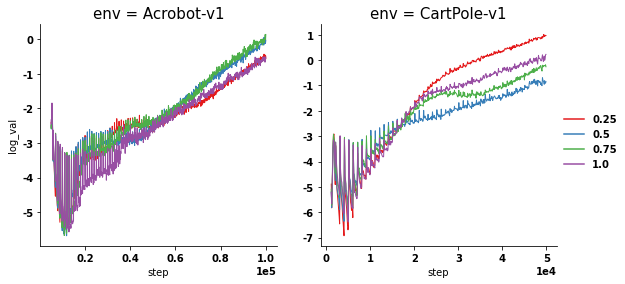

In [131]:
import numpy as np 
plt.figure(figsize=(20,10))
df_temp = df[df['step_agg']<1000000]
df_temp = df_temp[df_temp['seed']==0]
df_temp['log_val'] = np.log(df['value'])
g = sns.FacetGrid(df_temp, col="env", sharey=False,sharex=False, height=4, aspect=1, )
g.map_dataframe(sns.lineplot, x="step", y="log_val", hue="q", palette='Set1', lw=1, hue_order=['0.25', '0.5', '0.75', '1.0'])
g.add_legend()
for i, ax in enumerate(g.axes[0]):
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:d}'.format(int(x)) for x in vals])
    vals = ax.get_xticks()
    # ax.set_xticklabels([x for x in vals])
    ax.set_title(ax.get_title(), fontsize=15)
    ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.savefig(f'{save_dir}/distil_error.pdf')
    

# Time

In [100]:
df_temp =df[df['seed']==1]
minn = (
    df_temp
      .groupby('env')['time']
      .max().reindex(df_temp['env'])
)
minn
df_temp['norm_time'] = df_temp['time'] / minn.values

/tmp/ipykernel_16234/1580052393.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['norm_time'] = df_temp['time'] / minn.values


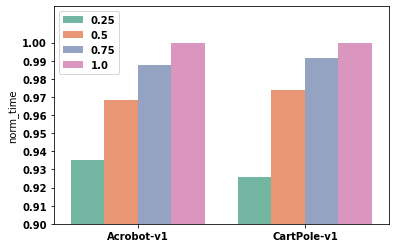

In [128]:
sns.barplot(data=df_temp, x="env", y="norm_time", hue="q", hue_order=['0.25', '0.5', '0.75', '1.0'], palette='Set2')
plt.ylim((0.9, 1.02))
plt.yticks([0.9+i*0.01 for i in range(11)])
plt.xlabel(None)
plt.xlabel(None)
plt.legend(loc='best')
plt.savefig(f'{save_dir}/duration.pdf')